# Redes Neurales Artificiales
Actividad Lección 8 || Programación Python para Machine Learning

Objetivos:
* Conocer los principios en los que se basan las Redes Neuronales Artificiales.
* Entender los elementos clave que conforman una Red Neuronal.
* Implementar un modelo de Red Neuronal en Python para resolver problemas de clasificación y regresión.
* Identificar los aspectos a tener en cuenta para mejorar el rendimiento de una Red Neuronal.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 19/12/2022

# Tabla de Contenidos
1. [Importes](#importes)
2. [Carga del dataset](#carga)
3. [Procesamiento](#procesamiento)
4. [Perceptrón Multicapa (MLP)](#mlp)
7. [Evaluación del modelo](#evaluacion)
8. [Optimizando MLP](#optimizando)

# Importes <a name="importes"></a>

In [1]:
import random, time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, metrics
from sklearn.neural_network import MLPClassifier

# Carga del dataset <a class="anchor" name="carga"></a>
Se cargan los datos del dataset “Optical Recognition of Handwritten Digits", compuesto por el fichero de entrenamiento (optdigits.tra) y el fichero de test (optdigits.tes). El dataset contiene 5620 imágenes de 8x8 píxeles, donde cada elemento es un número entero entre el rango 0..16, cada una de ellas representa un dígito del 0 al 9. El objetivo es clasificar cada imagen en una de las 10 clases posibles.

Los datos se cargan en un dataframe de pandas, y se muestran los 5 primeros registros.

El dataset al no tener cabecera se le añade una cabecera con los nombres de las columnas por lo que se identificarán siguiendo la nomenclatura "pixel1", "pixel2", ..., "pixel64" y "clase".

In [2]:
col_names = [f"pixel{i}" for i in range(1, 65)] + ["class"]

In [3]:
train_df = pd.read_csv("optdigits.tra", header=None, names=col_names)
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
test_df = pd.read_csv("optdigits.tes", header=None, names=col_names)
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


# Procesamiento <a class="anchor" name="procesamiento"></a>
* División de los datos de entrenamiento y prueba por sus variables dependientes e independientes
* Se utilizará StandardScaler para normalizar los datos.

In [5]:
# División X_train, y_train, X_test, y_test
X_train = train_df.drop(columns=['class'])
X_test = test_df.drop(columns=['class'])
y_train = train_df["class"]
y_test = test_df["class"]

# Normalización
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perceptrón Multicapa (MLP) <a class="anchor" name="mlp"></a>
El perceptrón multicapa es una red neuronal artificial formada por múltiples capas, con capacidad para resolver problemas que no son linealmente separables. Los nodos o perceptrones son la unidad funcional de este tipo de red neuronal, compuestas por la suma ponderada de sus entradas según los pesos de las conexiones más el bias y la posterior activación de una función de activación.

Cuentas con diversos hiperparámetros que influyen en el rendimiento del modelo, posteriormente se seleccionarán algunos y se tratará de buscar el más optimo

In [6]:
%%time # Medición del tiempo de ejecución
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), 
                    max_iter=1000, 
                    activation='logistic', 
                    solver="lbfgs", 
                    learning_rate="adaptive",
                    n_iter_no_change=50)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

CPU times: total: 7.08 s
Wall time: 4.43 s


# Evaluación del modelo <a class="anchor" name="evaluacion"></a>
Para evaluar el rendimiento de los modelos utilizaremos la métrica de precisión balanceada, la precisión y visualizaremos los resultados en una Matriz de Confusión.

$$\text{Precisión Balanceada} = \frac{Sensibilidad + Especificidad}{2}$$

y:

$$\text{Precisión} = \frac{TP + TN}{Total}$$

In [7]:
df_metrics = pd.DataFrame(columns=['Precisión Balanceada', 'Precisión'])
df_metrics.loc['Perceptrón Multicapa'] = [
    metrics.balanced_accuracy_score(y_test, y_pred),
    metrics.accuracy_score(y_test, y_pred)
]
df_metrics

,Precisión Balanceada,Precisión
Perceptrón Multicapa,0.948575,0.948804


La matriz de confusión resultante es:

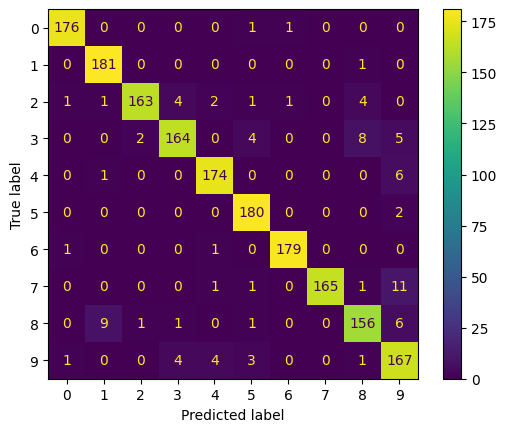

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

# Optimizando MLP <a class="anchor" name="optimizando"></a>
Teniendo en cuenta la métrica de precisión balanceada y la precisión, se emplarán diferentes valores de los siguientes hiperparámetros para ver cuales hacen que el modelo tenga mejor rendimiento:
1. **Número y tamaño de las capas ocultas**: Se emplearán un total de 7 muestras diferentes de capas ocultas
    1. Una capa oculta con 10 neuronas (10,)
    2. Dos capas ocultas con 50 neuronas en cada capa (50,50)
    3. Tres capas ocultas con 100 neuronas en cada capa (100,100,100)
2. **Funciones de activación**: Se emplearán las siguientes funciones de activación:
    1. Sigmoide (logistica): Transformación del valor de entrada en un rango 0 y 1
    2. Tagente Hiperbólica: Transformación del valor de entrada en un rango -1 y 1
    3. ReLU: Obtención del valor de entrada solo si es mayor que 0
3. **Algoritmo de entremaiento (solver)**: Se emplearán los siguientes algoritmos:
    1. lbfgs: Optimización quasi-Newton
    2. sgd: Descenso de gradiente estocástico
    3. adam: Optimización por gradiente estocástico
4. **Tasa de entrenamiento (pasos)**: Se emplearán las siguientes actualizaciones de los pesos:
    1. 0.001
    2. 0.01
    3. 0.1
5. **Tipo de entrenamiento (tipo)**: Se emplearán los siguientes tipos de entrenamiento que afectarán a la actualización de los pesos:
    1. Constante: Tasa de aprendizaje constante
    2. Escalado inverso: disminuye gradualmente la tasa de aprendizaje en cada paso de tiempo 't' usando un exponente de escala inversa
    3. Adaptativo: mantiene la tasa de aprendizaje constante siempre que la pérdida de entrenamiento siga disminuyendo.
6. **Iteraciones Máximas**: Se emplearán las siguientes iteraciones hasta que el solver converja o hasta que se alcance el máximo indicado:
    1. 3000
    2. 3500
    3. 4000
    
Se generarán un total de 729 modelos, de los cuales se listarán aquellos 10 que tengan un mejor rendimiento.

In [9]:
%%time
hidden_layers = [(10,), (50, 50), (100, 100, 100)]
activations = ['logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
learning_rates = ['constant', 'invscaling', 'adaptive']
learning_rates_init = [.001, .01, .1]
max_iters = [3000, 3500, 4000]
df_metrics = pd.DataFrame(columns=["activation", "solver", "hidden_layers", 
                                   "learning_rates", "learning_rates_init", 
                                   "max_iters", "balanced_accuracy", "accuracy"])
for hlayer in hidden_layers:
    for activation in activations:
        for solver in solvers:
            for learning_rate in learning_rates:
                for learning_rate_init in learning_rates_init:
                    for max_iter in max_iters:
                        mlp = MLPClassifier(hidden_layer_sizes=hlayer, 
                                            max_iter=max_iter, 
                                            activation=activation, 
                                            solver=solver,
                                            n_iter_no_change=20,
                                            learning_rate=learning_rate,
                                            learning_rate_init=learning_rate_init)
                        mlp.fit(X_train, y_train)
                        y_pred = mlp.predict(X_test)
                        df_metrics.loc[len(df_metrics)] = [
                            activation, solver, hlayer,
                            learning_rate, learning_rate_init, max_iter,
                            metrics.balanced_accuracy_score(y_test, y_pred),
                            metrics.accuracy_score(y_test, y_pred)
                        ]
print("Done Optimization!")

Z:\Formacion\003. Máster Python EIP\Master_Python_Eip\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
Z:\Formacion\003. Máster Python EIP\Master_Python_Eip\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
Z:\Formacion\003. Máster Python EIP\Master_Python_Eip\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


Done Optimization!
CPU times: total: 3h 22s
Wall time: 2h 15min 45s


Una vez finalizado el proceso de optimización podemos observar los siguientes mejores resultados

In [10]:
df_metrics.sort_values(by=['balanced_accuracy', 'accuracy'], ascending=False).head(10)

,activation,solver,hidden_layers,learning_rates,learning_rates_init,max_iters,balanced_accuracy,accuracy
459,relu,adam,"(50, 50)",constant,0.001,3000,0.973677,0.973845
634,tanh,adam,"(100, 100, 100)",invscaling,0.010,3500,0.972522,0.972732
626,tanh,adam,"(100, 100, 100)",constant,0.010,4000,0.971960,0.972176
464,relu,adam,"(50, 50)",constant,0.010,4000,0.970467,0.970506
658,relu,lbfgs,"(100, 100, 100)",invscaling,0.001,3500,0.970388,0.970506
633,tanh,adam,"(100, 100, 100)",invscaling,0.010,3000,0.970344,0.970506
705,relu,adam,"(100, 100, 100)",constant,0.010,3000,0.970313,0.970506
599,tanh,sgd,"(100, 100, 100)",constant,0.010,4000,0.970275,0.970506
600,tanh,sgd,"(100, 100, 100)",constant,0.100,3000,0.970259,0.970506
716,relu,adam,"(100, 100, 100)",invscaling,0.010,4000,0.969858,0.969950


Tras la visualización de resultados, podemos confirmar que los hiperparámetros óptimos para este modelo de Perceptrón Multicapa son:
- **Funcion de activación**: ReLU
- **Algoritmo de entrenamiento**: ADAM 
- **Número y tamaño de capas ocultas**: (50, 50)
- **Tasa de entrenamiento**: 0.001
- **Tipo de entrenamiento**: Constante
- **Iteraciones máximas**: 3000